In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
from dateutil.relativedelta import relativedelta

plt.rcParams.update({'figure.max_open_warning': 0})
pd.options.mode.chained_assignment = None

In [2]:
input_file = '~/Repositories/covid-19-data/public/data/owid-covid-data.csv'

n = 21
group_one = ['USA', 'IND']
fig_size = (15, 3)
continents = ['Africa', 'Asia', 'Europe', 'European Union', 'North America', 'Oceania', 'South America']

today = datetime.today().strftime('%Y-%m-%d')
two_days = (datetime.today()-relativedelta(days=2)).strftime('%Y-%m-%d')
one_day = (datetime.today()-relativedelta(days=1)).strftime('%Y-%m-%d')
last_day = two_days

In [3]:
inp = pd.read_csv(input_file)
inp['daily_tests'] = inp['new_tests'].rolling(7).mean()
inp['daily_cases'] = inp['new_cases'].rolling(7).mean()
inp['daily_deaths'] = inp['new_deaths'].rolling(7).mean()
inp['daily_hosp'] = inp['hosp_patients'].rolling(7).mean()
inp['daily_vacc'] = inp['new_vaccinations'].rolling(7).mean()
inp['daily_deaths_change_1w'] = inp['daily_deaths'].pct_change(periods=6)*100
inp['daily_cases_change_1w'] = inp['daily_cases'].pct_change(periods=6)*100
inp['daily_hosp_change_1w'] = inp['daily_hosp'].pct_change(periods=6)*100
inp['daily_vacc_change_1w'] = inp['daily_vacc'].rolling(7).mean()

inp['cfr'] = (100*inp['total_deaths'].rolling(7).sum()/inp['total_cases'].rolling(7).sum()).round(2)
inp['cfr_current'] = (100*inp['daily_deaths'].rolling(7).sum()/inp['daily_cases'].rolling(7).sum()).round(2)
inp['ptr'] = (100*inp['total_cases'].rolling(7).sum()/inp['total_tests'].rolling(7).sum()).round(2)
inp['ptr_current'] = (100*inp['daily_cases'].rolling(7).sum()/inp['daily_tests'].rolling(7).sum()).round(2)
inp['date'] = pd.to_datetime(inp['date'])

# print(inp.columns)
# inp[inp['iso_code'].isin(['OWID_WRL']+group_one)].groupby('iso_code').tail(3)[[
#     'iso_code', 'date', 'total_cases', 'total_deaths', 'total_vaccinations', 'total_vaccinations_per_hundred',
#     'daily_cases', 'daily_deaths', 'daily_hosp', 'daily_vacc',
#     'daily_deaths_change_1w', 'daily_cases_change_1w', 'daily_hosp_change_1w', 'daily_vacc_change_1w',
#     'cfr', 'cfr_current', 'ptr', 'ptr_current']]

In [4]:
top_n = inp[(inp['date'] == last_day) & ~inp['location'].isin(continents) & (inp['total_cases'] >= 1000000)].sort_values(
    'total_cases', ascending=False)['iso_code'].tolist()

In [5]:
df = inp[(inp['iso_code'].isin(top_n)) & (inp['date'] == last_day)][[
    'date', 'iso_code', 'population', 'total_cases', 'total_deaths', 'total_vaccinations', 'total_vaccinations_per_hundred',
    'cfr', 'daily_cases_change_1w', 'daily_deaths_change_1w']]

df['cases_%_world'] = (df['total_cases']*100)/int(df[df['iso_code'] == 'OWID_WRL']['total_cases'])
df['deaths_%_world'] = (df['total_deaths']*100)/int(df[df['iso_code'] == 'OWID_WRL']['total_deaths'])
df['cases_1M_pop'] = ((df['total_cases']*1000000)/(df['population'])).astype(int)
df['deaths_1M_pop'] = ((df['total_deaths']*1000000)/(df['population'])).astype(int)

df.sort_values('cases_%_world', ascending=False).set_index('iso_code')

,date,population,total_cases,total_deaths,total_vaccinations,total_vaccinations_per_hundred,cfr,daily_cases_change_1w,daily_deaths_change_1w,cases_%_world,deaths_%_world,cases_1M_pop,deaths_1M_pop
iso_code,,,,,,,,,,,,,
OWID_WRL,2021-02-15,7.794799e+09,109156886.0,2407873.0,177940478.0,2.28,2.20,-11.757275,-10.050624,100.000000,100.000000,14003,308
USA,2021-02-15,3.310026e+08,27694226.0,486325.0,NaN,NaN,1.75,-21.108128,-15.621652,25.371030,20.197286,83667,1469
IND,2021-02-15,1.380004e+09,10925710.0,155813.0,8720822.0,0.63,1.43,-3.306325,-0.152439,10.009181,6.470981,7917,112
BRA,2021-02-15,2.125594e+08,9866710.0,239773.0,5293979.0,2.49,2.43,8.199667,14.255998,9.039017,9.957876,46418,1128
GBR,2021-02-15,6.788600e+07,4059696.0,117622.0,NaN,NaN,2.89,-26.348553,-21.109399,3.719139,4.884892,59801,1732
RUS,2021-02-15,1.459345e+08,4040505.0,79210.0,NaN,NaN,1.95,-9.373575,0.505201,3.701558,3.289625,27687,542
FRA,2021-02-15,6.527351e+07,3528856.0,82374.0,NaN,NaN,2.34,-5.187917,-3.743132,3.232829,3.421028,54062,1261
ESP,2021-02-15,4.675478e+07,3086286.0,65449.0,NaN,NaN,2.11,-36.725514,-3.132678,2.827386,2.718125,66010,1399
ITA,2021-02-15,6.046183e+07,2729223.0,93835.0,3044535.0,5.04,3.45,-0.230194,-15.161776,2.500276,3.897008,45139,1551


<AxesSubplot:title={'center':'Vaccinations'}, xlabel='iso_code'>

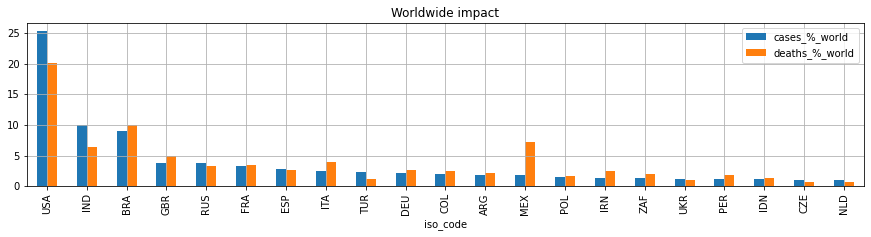

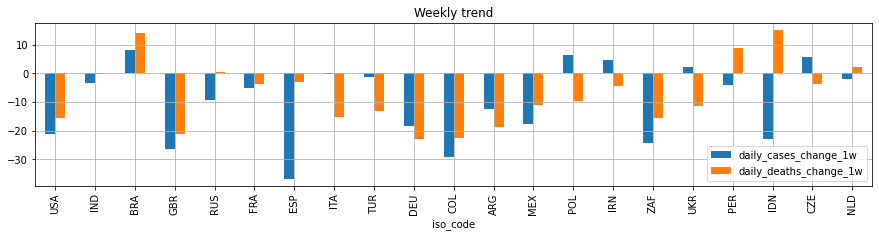

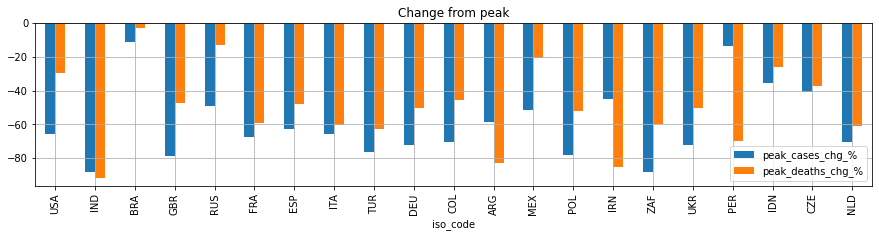

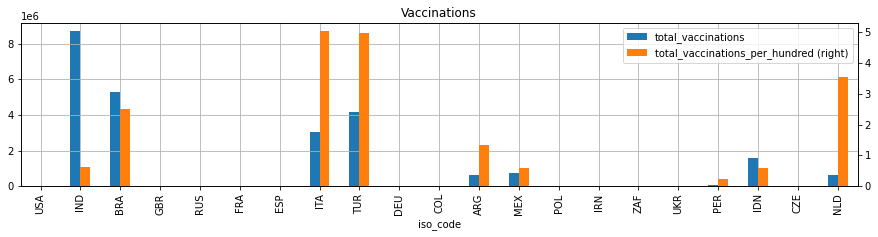

In [6]:
df[df['iso_code'] != 'OWID_WRL'].sort_values('cases_%_world', ascending=False).plot(
    x='iso_code', y=['cases_%_world', 'deaths_%_world'],
    kind='bar', figsize=fig_size, grid=True, title='Worldwide impact')

df[df['iso_code'] != 'OWID_WRL'].sort_values('cases_%_world', ascending=False).plot(
    x='iso_code', y=['daily_cases_change_1w', 'daily_deaths_change_1w'],
    kind='bar', figsize=fig_size, grid=True, title='Weekly trend')

df_max = inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] <= last_day)].groupby('iso_code')[['daily_cases', 'daily_deaths']].max()
df_last = inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)][['iso_code', 'daily_cases', 'daily_deaths']].set_index('iso_code')
df_pct_chg_max = ((df_last-df_max)*100/df_max)
df_pct_chg_max['total_cases'] = inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].set_index('iso_code')['total_cases']
df_pct_chg_max = df_pct_chg_max.rename(columns={'daily_cases': 'peak_cases_chg_%','daily_deaths': 'peak_deaths_chg_%'})

df_pct_chg_max.sort_values(by='total_cases', ascending=False).plot(
    y=['peak_cases_chg_%', 'peak_deaths_chg_%'],
    kind='bar', figsize=fig_size, grid=True, title='Change from peak')

df[df['iso_code'] != 'OWID_WRL'].sort_values('cases_%_world', ascending=False).plot(
    x='iso_code', y=['total_vaccinations', 'total_vaccinations_per_hundred'], secondary_y=['total_vaccinations_per_hundred'],
    kind='bar', figsize=fig_size, grid=True, title='Vaccinations')

In [7]:
df_pct_chg_max

,peak_cases_chg_%,peak_deaths_chg_%,total_cases
iso_code,,,
ARG,-58.659048,-83.176385,2029057.0
BRA,-11.205310,-3.047776,9866710.0
COL,-70.330163,-45.461174,2198549.0
CZE,-41.053549,-37.534060,1090860.0
DEU,-71.961575,-50.535058,2346876.0
ESP,-62.481521,-47.953795,3086286.0
FRA,-67.342604,-58.942434,3528856.0
GBR,-78.896609,-47.463231,4059696.0
IDN,-35.758229,-25.843736,1223930.0


<AxesSubplot:title={'center':'Top total vaccs'}, xlabel='iso_code'>

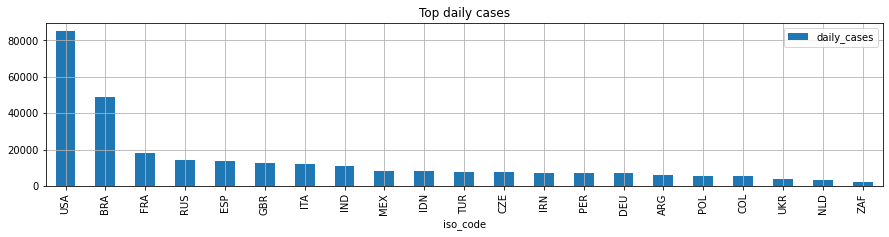

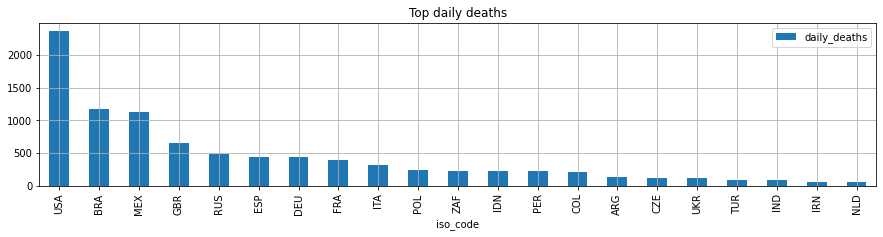

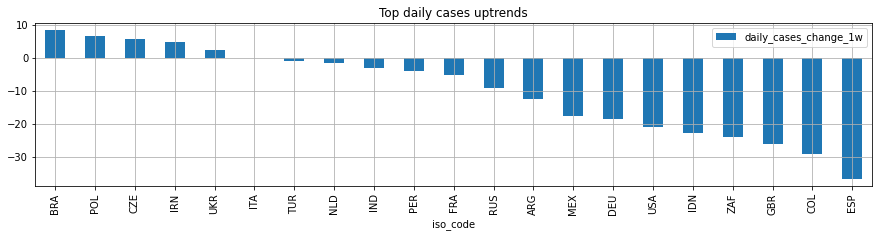

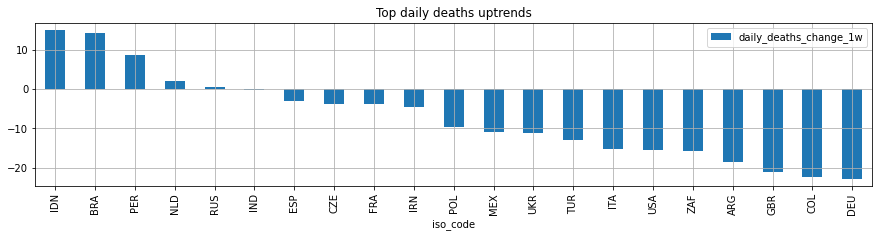

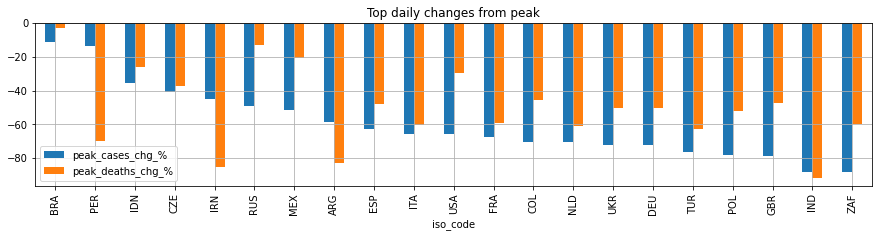

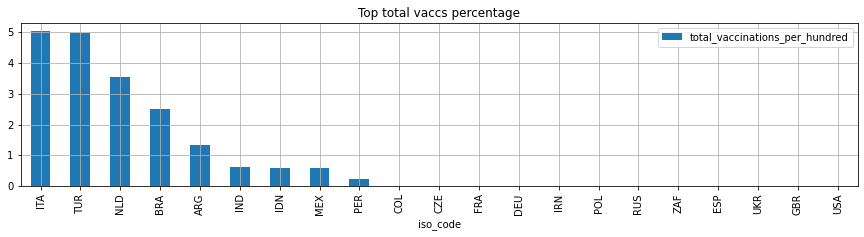

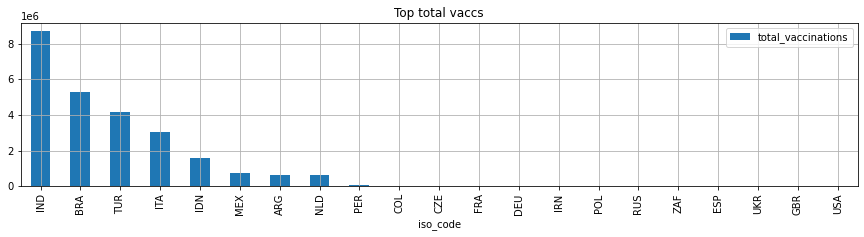

In [8]:
inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].sort_values(
    by='daily_cases', ascending=False).head(n).plot(
    x='iso_code', y=['daily_cases'], kind='bar',
    figsize=fig_size, grid=True, title='Top daily cases')

inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].sort_values(
    by='daily_deaths', ascending=False).head(n).plot(
    x='iso_code', y=['daily_deaths'], kind='bar',
    figsize=fig_size, grid=True, title='Top daily deaths')

inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].sort_values(
    by='daily_cases_change_1w', ascending=False).head(n).plot(
    x='iso_code', y=['daily_cases_change_1w'], kind='bar',
    figsize=fig_size, grid=True, title='Top daily cases uptrends')

inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].sort_values(
    by='daily_deaths_change_1w', ascending=False).head(n).plot(
    x='iso_code', y=['daily_deaths_change_1w'], kind='bar',
    figsize=fig_size, grid=True, title='Top daily deaths uptrends')

df_pct_chg_max.sort_values(by=['peak_cases_chg_%', 'peak_deaths_chg_%', 'total_cases'], ascending=[False, False, False]).plot(
    y=['peak_cases_chg_%', 'peak_deaths_chg_%'],
    kind='bar', figsize=fig_size, grid=True, title='Top daily changes from peak')

inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].sort_values(
    by='total_vaccinations_per_hundred', ascending=False).head(n).plot(
    x='iso_code', y=['total_vaccinations_per_hundred'], kind='bar',
    figsize=fig_size, grid=True, title='Top total vaccs percentage')

inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].sort_values(
    by='total_vaccinations', ascending=False).head(n).plot(
    x='iso_code', y=['total_vaccinations'], kind='bar',
    figsize=fig_size, grid=True, title='Top total vaccs')

In [9]:
def plot_weekly_avg(df, iso_code='USA'):
    df[(df['iso_code'] == iso_code) & (df['date'] >= '2020-03-01')][[
        'date', 'daily_cases', 'daily_deaths', 'daily_hosp', 'daily_vacc']].plot(
        x='date', y=['daily_cases', 'daily_deaths', 'daily_hosp'],
        secondary_y=['daily_deaths'],
        style = ['-', '-', '--', '--'], figsize=fig_size, grid=True, title=country)
    
def plot_cfr(df, iso_code='USA'):
    df[(df['iso_code'] == iso_code) & (df['date'] >= '2020-03-01')].plot(
        x='date', y='cfr', style = ['--'], figsize=fig_size, grid=True, title=country)
    
def plot_ptr(df, iso_code='USA'):
    df[(df['iso_code'] == iso_code) & (df['date'] >= '2020-03-01')].plot(
        x='date', y='ptr',
        style = ['--'], figsize=fig_size, grid=True, title=country)
    
def plot_totals(df, iso_code='USA'):
    df[(df['iso_code'] == iso_code) & (df['date'] >= '2020-03-01')][[
        'date', 'total_cases', 'total_deaths', 'total_vaccinations']].plot(
        x='date', y=['total_cases', 'total_deaths', 'total_vaccinations'], secondary_y=['total_deaths'],
        style = ['-', '-', '--'], figsize=fig_size, grid=True, title=country)

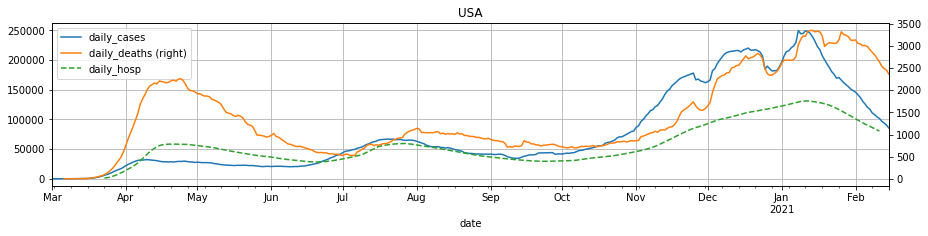

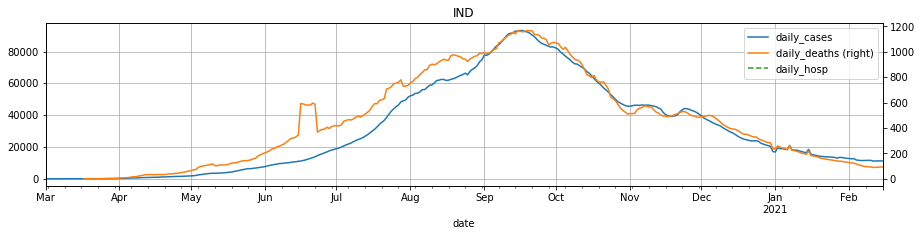

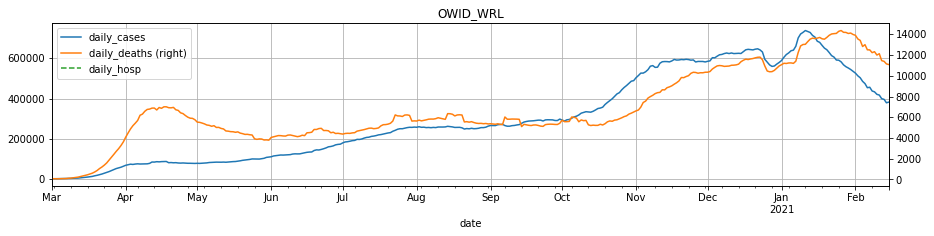

In [10]:
for country in group_one+['OWID_WRL']:
    plot_weekly_avg(inp, iso_code=country)

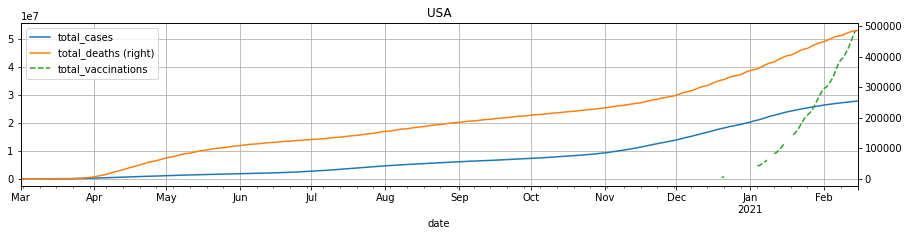

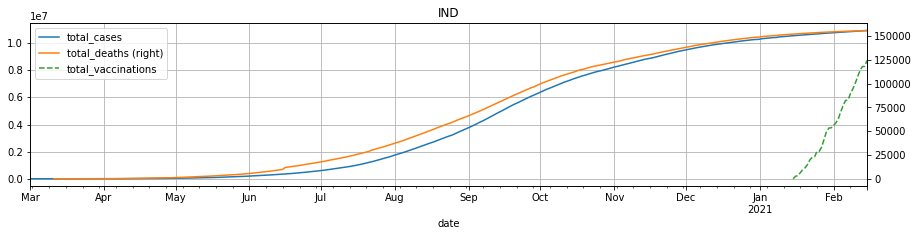

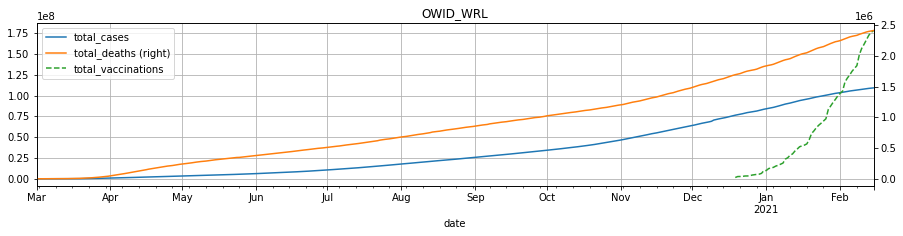

In [11]:
for country in group_one+['OWID_WRL']:
    plot_totals(inp, iso_code=country)

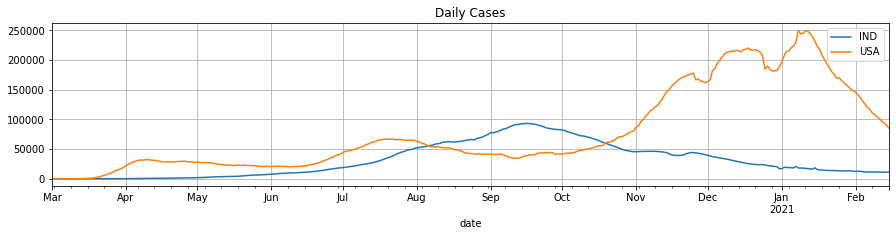

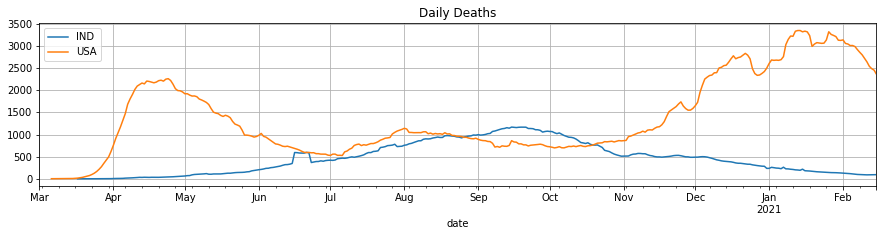

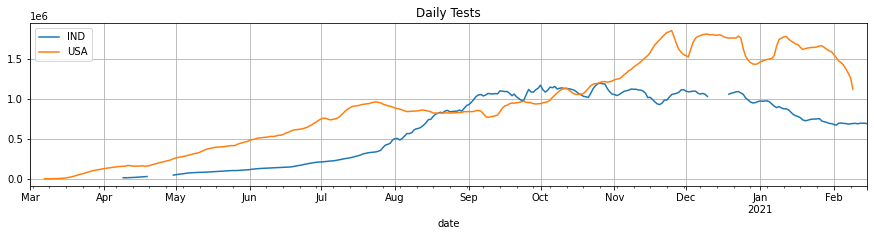

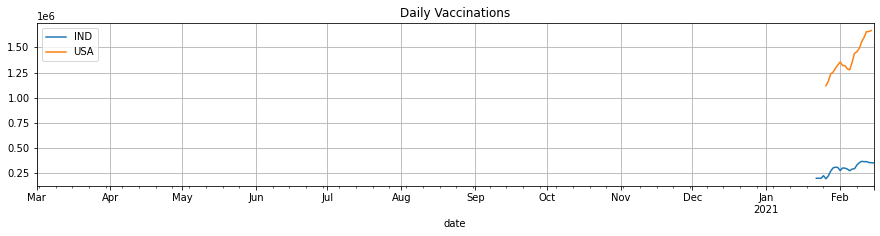

In [12]:
fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['daily_cases'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='Daily Cases')
axes.legend(list(sorted(group_one)))

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['daily_deaths'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='Daily Deaths')
axes.legend(list(sorted(group_one)))

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['daily_tests'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='Daily Tests')
axes.legend(list(sorted(group_one)))

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['daily_vacc'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='Daily Vaccinations')
axes.legend(list(sorted(group_one)))

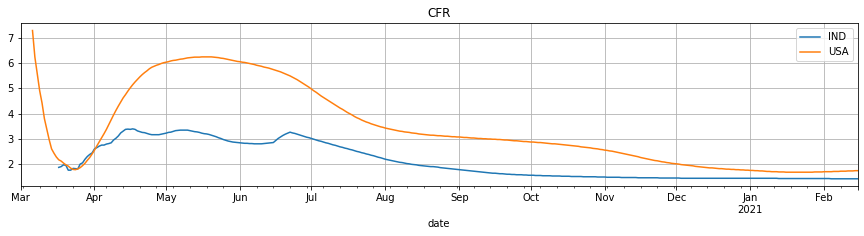

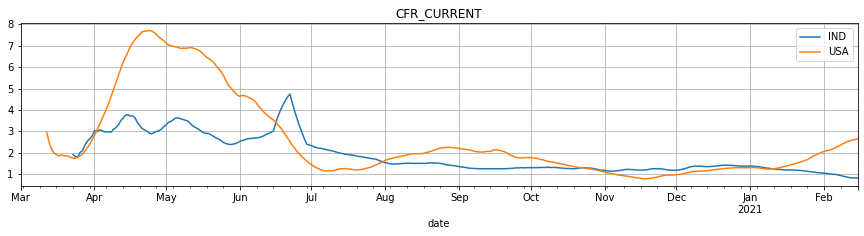

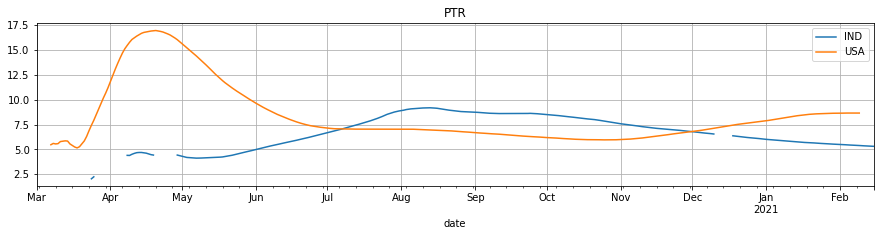

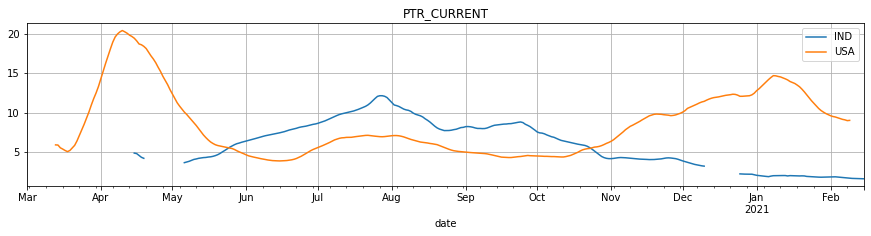

In [13]:
fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['cfr'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='CFR')
axes.legend(list(sorted(group_one)))

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['cfr_current'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='CFR_CURRENT')
axes.legend(list(sorted(group_one)))

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['ptr'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='PTR')
axes.legend(list(sorted(group_one)))

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['ptr_current'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='PTR_CURRENT')
axes.legend(list(sorted(group_one)))

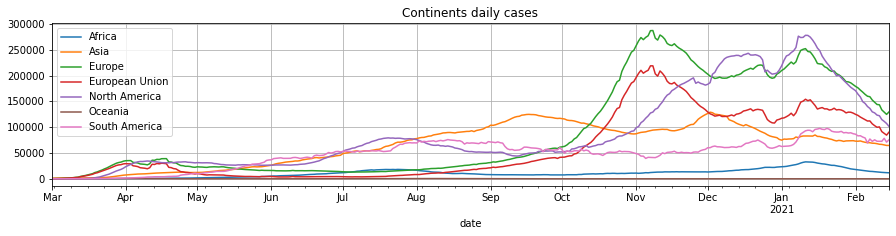

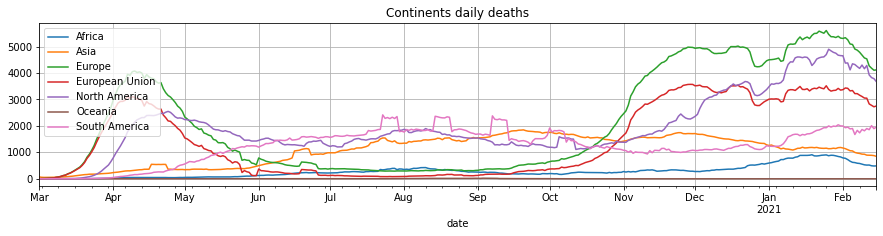

In [14]:
inp_continents = inp[inp['location'].isin(continents) & (inp['date'] >= '2020-03-01')]
fig, axes = plt.subplots(sharex=True)

for c in continents:
    inp_continents[inp_continents['location'] == c].plot(
        x='date', y='daily_cases',
        figsize=fig_size, grid=True, ax=axes, title='Continents daily cases')
    
axes.legend(list(sorted(continents)))

inp_continents = inp[inp['location'].isin(continents) & (inp['date'] >= '2020-03-01')]

fig, axes = plt.subplots(sharex=True)

for c in continents:
    inp_continents[inp_continents['location'] == c].plot(
        x='date', y='daily_deaths',
        figsize=fig_size, grid=True, ax=axes, title='Continents daily deaths')
    
axes.legend(list(sorted(continents)))

<AxesSubplot:title={'center':'Continents totals'}, xlabel='location'>

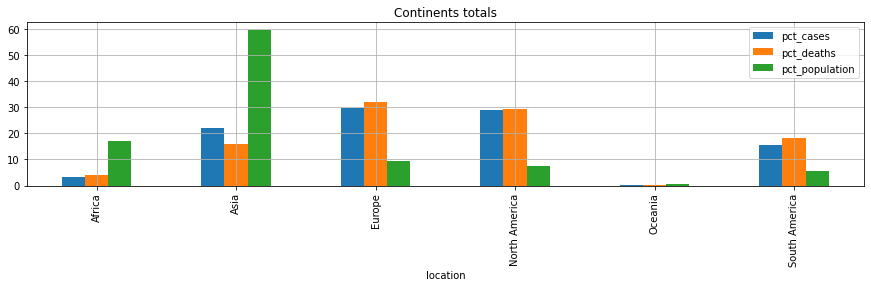

In [15]:
inp_continents_current = inp_continents[(inp_continents['location'] != 'European Union') &
                                        (inp_continents['date'] == last_day)]

inp_continents_current['pct_cases'] = inp_continents_current['total_cases']*100/inp_continents_current['total_cases'].sum()
inp_continents_current['pct_deaths'] = inp_continents_current['total_deaths']*100/inp_continents_current['total_deaths'].sum()
inp_continents_current['pct_population'] = [17.2, 59.54, 9.59, 7.6, 0.55, 5.53]

inp_continents_current.plot(
    x='location', y=['pct_cases', 'pct_deaths', 'pct_population'],
    kind='bar', figsize=fig_size, grid=True, title='Continents totals')